In [2]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

In [12]:
rating_matrix_sparse = load_npz('./cleora/rating_matrix_sparse.npz')
row_indices = rating_matrix_sparse.row
col_indices = rating_matrix_sparse.col
data = rating_matrix_sparse.data

entries = np.vstack((row_indices, col_indices, data)).T


In [13]:
import numpy as np
from scipy.sparse import coo_matrix, save_npz, load_npz
from sklearn.model_selection import train_test_split

train_entries, test_entries = train_test_split(entries, test_size=0.2, random_state=42)

num_users, num_games = rating_matrix_sparse.shape
train_matrix = coo_matrix((train_entries[:, 2], (train_entries[:, 0], train_entries[:, 1])),
                          shape=(num_users, num_games))
test_matrix = coo_matrix((test_entries[:, 2], (test_entries[:, 0], test_entries[:, 1])),
                         shape=(num_users, num_games))

from scipy.sparse import save_npz
save_npz('train_matrix.npz', train_matrix)
save_npz('test_matrix.npz', test_matrix)

Średnia liczba rekomendacji na użytkownika: 2.99
Średnia liczba rekomendacji na grę: 1094.25


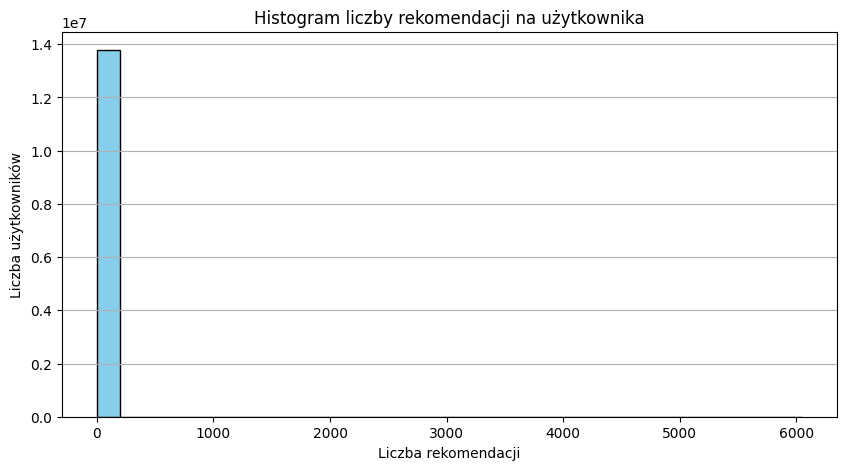

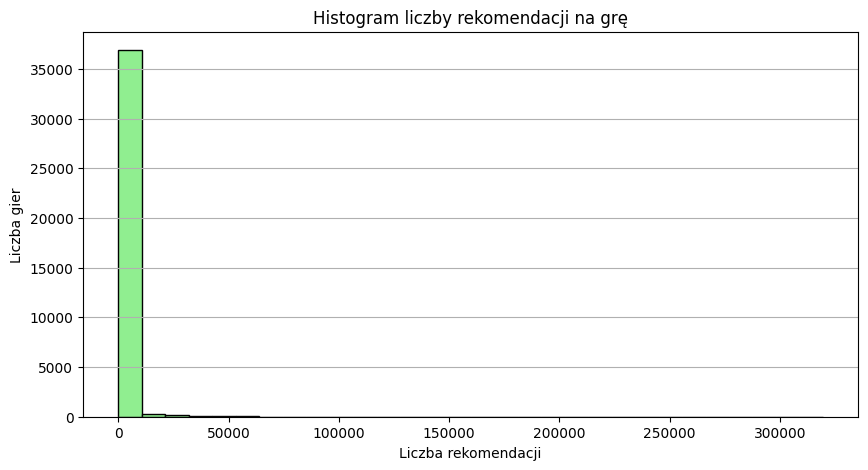

In [ ]:
import matplotlib.pyplot as plt
recommendations = pd.read_csv('./cleora/recommendations.csv')

user_recommendations = recommendations.groupby('user_id')['review_id'].count()
app_recommendations = recommendations.groupby('app_id')['review_id'].count()

avg_user_recommendations = user_recommendations.mean()
avg_app_recommendations = app_recommendations.mean()

print(f"Średnia liczba rekomendacji na użytkownika: {avg_user_recommendations:.2f}")
print(f"Średnia liczba rekomendacji na grę: {avg_app_recommendations:.2f}")

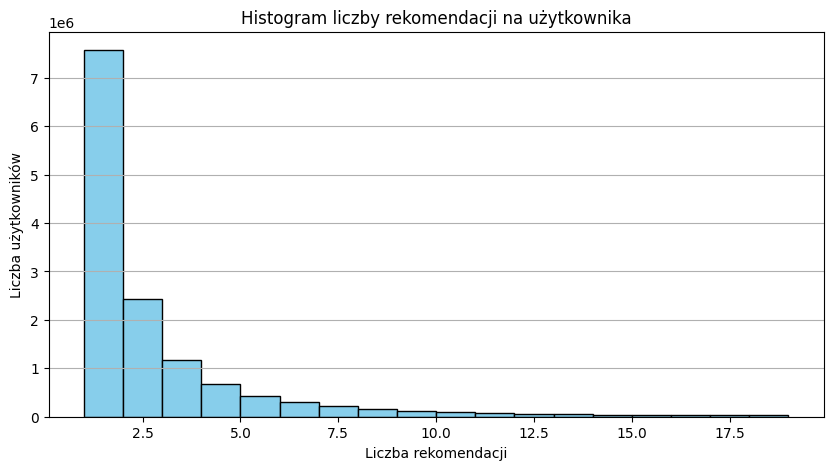

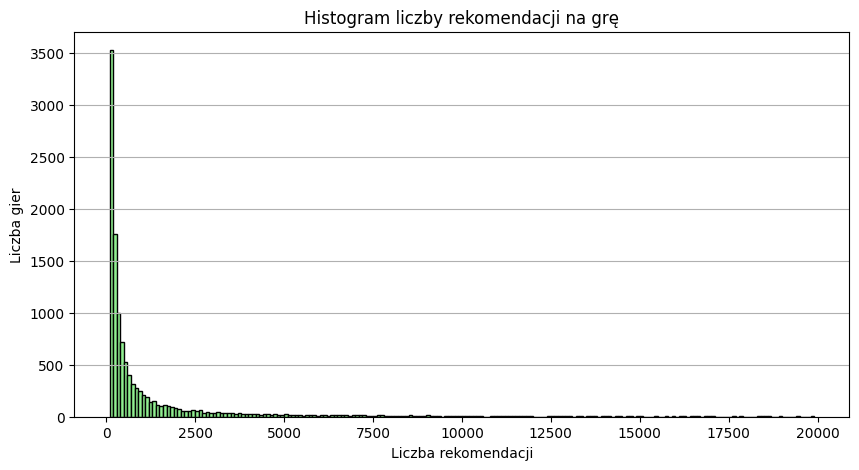

In [13]:
plt.figure(figsize=(10, 5))
plt.hist(user_recommendations, bins=range(1, 20, 1), color='skyblue', edgecolor='black')
plt.title('Histogram liczby rekomendacji na użytkownika')
plt.xlabel('Liczba rekomendacji')
plt.ylabel('Liczba użytkowników')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(app_recommendations, bins=range(100, 20000, 100), color='lightgreen', edgecolor='black')
plt.title('Histogram liczby rekomendacji na grę')
plt.xlabel('Liczba rekomendacji')
plt.ylabel('Liczba gier')
plt.grid(axis='y')
plt.show()

In [ ]:
import pandas as pd

# 1. Wczytaj dane z pliku recommendations.csv
df = pd.read_csv('cleora/recommendations.csv')

# 2. Stwórz słownik, gdzie kluczem jest app_id, a wartością liczba wierszy dla tego app_id
app_recommendations_count = df['app_id'].value_counts().to_dict()


# 3. Stwórz nowy DataFrame, pomijając app_id, które mają mniej niż 15 wystąpień
filtered_df = df[df['app_id'].apply(lambda x: app_recommendations_count[x] >= 15)]

# 4. Zapisz nowy DataFrame do pliku
filtered_df.to_csv('filtered_recommendations.csv', index=False)

print(f"Zapisano przefiltrowany plik z {len(filtered_df)} wierszami.")

Zapisano przefiltrowany plik z 41073462 wierszami.
